In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#!pip install nltk

from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#from nltk.sentiment.util import *

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "/home/octo/Desktop/stocknews"]).decode("utf8"))
#print(check_output(["pwd"]).decode("utf8"))


# Any results you write to the current directory are saved as output.

Combined_News_DJIA.csv
DJIA_table.csv
RedditNews.csv



/home/octo/anaconda2/envs/carnd-term1/lib/python3.5/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
df = pd.read_csv('/home/octo/Desktop/stocknews/Combined_News_DJIA.csv')

In [3]:
df.head(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."


In [4]:
from nltk import tokenize

tricky_sentences = df['Top1']
sid = SentimentIntensityAnalyzer()
for sentence in tricky_sentences:
    #print(sentence)
    ss = sid.polarity_scores(sentence)
    print( ss['compound'] )

-0.5994
0.8156
0.0258
-0.7184
0.2023
-0.7481
-0.9246
-0.7906
-0.2732
0.3818
0.3612
-0.5574
-0.4215
-0.6705
0.4019
-0.6486
-0.9081
0.0
0.0
-0.6533
-0.5859
-0.5574
-0.5574
0.2023
0.0
-0.3612
0.4745
-0.6486
-0.7351
-0.5574
0.0
-0.7506
-0.4939
0.0
0.34
0.0
0.4019
0.4005
-0.5267
-0.802
0.6369
-0.4767
-0.7003
-0.6124
0.0258
0.0
-0.4939
0.1027
0.0
0.0
0.2732
-0.0516
0.296
0.3818
0.0
-0.6249
-0.5423
0.126
0.0
0.0
0.0
0.4019
-0.4588
-0.6868
0.0
-0.4404
0.0
-0.7717
0.6597
0.6199
-0.7995
0.0
-0.3182
0.0
-0.3612
-0.8271
0.4019
0.0
0.3261
-0.6249
0.1779
0.6369
-0.5423
-0.7184
0.4215
0.5719
-0.7906
0.0
-0.8126
0.1027
-0.5106
-0.1779
-0.3818
-0.5165
-0.6597
0.0
0.0
-0.7906
-0.6908
-0.8442
-0.4215
0.0
0.0
0.0
-0.3818
0.0
-0.3182
-0.0572
0.0
0.0
-0.7964
0.0
-0.91
-0.296
0.4019
-0.7506
-0.6319
-0.8625
0.0
0.0
0.0
0.0
-0.1406
-0.3182
0.2023
0.0
0.0
-0.1531
-0.2263
-0.6908
-0.5984
0.0
-0.5719
-0.4512
-0.743
0.2263
0.0258
-0.4023
-0.765
-0.6908
0.0
0.2023
-0.0572
-0.2263
-0.2617
0.5719
0.3612
-0.743
-0.827

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

In [6]:
data=df

In [7]:
train = data[data['Date'] < '2015-01-01']
test = data[data['Date'] > '2014-12-31']

## Text Preprocessing

In [8]:
example = train.iloc[2,10]
print(example)

b"The US military was surprised by the timing and swiftness of the Russian military's move into South Ossetia and is still trying to sort out what happened, a US defense official said Monday"


In [9]:
example2 = example.lower()
print(example2)

b"the us military was surprised by the timing and swiftness of the russian military's move into south ossetia and is still trying to sort out what happened, a us defense official said monday"


In [10]:
example3 = CountVectorizer().build_tokenizer()(example2)
print(example3)

['the', 'us', 'military', 'was', 'surprised', 'by', 'the', 'timing', 'and', 'swiftness', 'of', 'the', 'russian', 'military', 'move', 'into', 'south', 'ossetia', 'and', 'is', 'still', 'trying', 'to', 'sort', 'out', 'what', 'happened', 'us', 'defense', 'official', 'said', 'monday']


In [11]:
pd.DataFrame([[x,example3.count(x)] for x in set(example3)], columns = ['Word', 'Count'])

,Word,Count
0,the,3
1,south,1
2,defense,1
3,ossetia,1
4,military,2
5,sort,1
6,swiftness,1
7,out,1
8,was,1
9,what,1


## Basic Model Training and Testing

In [12]:
trainheadlines = []
for row in range(0,len(train.index)):
    trainheadlines.append(' '.join(str(x) for x in train.iloc[row,2:27]))

In [13]:
basicvectorizer = CountVectorizer()
basictrain = basicvectorizer.fit_transform(trainheadlines)
print(basictrain.shape)

(1611, 31675)


In [14]:
basicmodel = LogisticRegression()
basicmodel = basicmodel.fit(basictrain, train["Label"])

In [15]:
testheadlines = []
for row in range(0,len(test.index)):
    testheadlines.append(' '.join(str(x) for x in test.iloc[row,2:27]))
basictest = basicvectorizer.transform(testheadlines)
predictions = basicmodel.predict(basictest)

In [16]:
pd.crosstab(test["Label"], predictions, rownames=["Actual"], colnames=["Predicted"])

Predicted,0,1
Actual,,
0,61,125
1,92,100


In [17]:
basicwords = basicvectorizer.get_feature_names()
basiccoeffs = basicmodel.coef_.tolist()[0]
coeffdf = pd.DataFrame({'Word' : basicwords, 
                        'Coefficient' : basiccoeffs})
coeffdf = coeffdf.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
coeffdf.head(10)

,Coefficient,Word
19419,0.497924,nigeria
25261,0.452526,self
29286,0.428011,tv
15998,0.425863,korea
20135,0.425716,olympics
15843,0.411636,kills
26323,0.411267,so
29256,0.394855,turn
10874,0.388555,fears
28274,0.384031,territory


In [18]:
#Advance modeling
advancedvectorizer = CountVectorizer(ngram_range=(2,2))
advancedtrain = advancedvectorizer.fit_transform(trainheadlines)

In [19]:
print(advancedtrain.shape)

(1611, 366721)


In [20]:
advancedmodel = LogisticRegression()
advancedmodel = advancedmodel.fit(advancedtrain, train["Label"])

In [21]:
testheadlines = []
for row in range(0,len(test.index)):
    testheadlines.append(' '.join(str(x) for x in test.iloc[row,2:27]))
advancedtest = advancedvectorizer.transform(testheadlines)
advpredictions = advancedmodel.predict(advancedtest)

In [22]:
pd.crosstab(test["Label"], advpredictions, rownames=["Actual"], colnames=["Predicted"])

Predicted,0,1
Actual,,
0,66,120
1,45,147


In [23]:
#57%
advwords = advancedvectorizer.get_feature_names()
advcoeffs = advancedmodel.coef_.tolist()[0]
advcoeffdf = pd.DataFrame({'Words' : advwords, 
                        'Coefficient' : advcoeffs})
advcoeffdf = advcoeffdf.sort_values(['Coefficient', 'Words'], ascending=[0, 1])
advcoeffdf.head(10)

,Coefficient,Words
272047,0.286533,right to
24710,0.275274,and other
285392,0.274698,set to
316194,0.262873,the first
157511,0.227943,in china
159522,0.224184,in south
125870,0.219130,found in
124411,0.216726,forced to
173246,0.211137,it has
322590,0.209239,this is


In [24]:
#ref: https://www.kaggle.com/ndrewgele/omg-nlp-with-the-djia-and-reddit
#https://github.com/justmarkham/pycon-2016-tutorial

In [25]:
#data
#https://www.kaggle.com/dgawlik/nyse

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import math, time
import itertools
from sklearn import preprocessing
import datetime
from operator import itemgetter
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
from keras.models import load_model
import keras
import h5py
import requests
import os

Using TensorFlow backend.


In [51]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import pandas as pd
from pandas import datetime
import math, time
import itertools
from sklearn import preprocessing
import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
from keras.models import load_model
import keras
import pandas_datareader.data as web
import h5py

In [102]:
#https://www.kaggle.com/benjibb/lstm-stock-prediction-20170507
#https://github.com/BenjiKCF/Neural-Network-with-Financial-Time-Series-Data/blob/master/LSTM_Stock_prediction_20170508.ipynb

In [27]:
df = pd.read_csv("/home/octo/Downloads/nyse/prices-split-adjusted.csv", index_col = 0)
df["adj close"] = df.close # Moving close to the last column
df.drop(['close'], 1, inplace=True) # Moving close to the last column
df.head()

,symbol,open,low,high,volume,adj close
date,,,,,,
2016-01-05,WLTW,123.430000,122.309998,126.250000,2163600.0,125.839996
2016-01-06,WLTW,125.239998,119.940002,125.540001,2386400.0,119.980003
2016-01-07,WLTW,116.379997,114.930000,119.739998,2489500.0,114.949997
2016-01-08,WLTW,115.480003,113.500000,117.440002,2006300.0,116.620003
2016-01-11,WLTW,117.010002,114.089996,117.330002,1408600.0,114.970001


In [28]:
df2 = pd.read_csv("/home/octo/Downloads/nyse/fundamentals.csv")
df2.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [29]:
#Extract all symbols from the list
symbols = list(set(df.symbol))
len(symbols)

501

In [30]:
symbols[:11] # Example of what is in symbols

['PAYX',
 'FFIV',
 'GGP',
 'ADP',
 'IPG',
 'ORCL',
 'LLTC',
 'ROP',
 'EOG',
 'AEE',
 'TROW']

In [31]:
df = df[df.symbol == 'GOOG']
df.drop(['symbol'],1,inplace=True)
df.head()

,open,low,high,volume,adj close
date,,,,,
2010-01-04,312.304948,310.955001,313.580158,3927000.0,312.205308
2010-01-05,312.419511,309.610028,312.748278,6031900.0,310.830459
2010-01-06,311.761979,302.048370,311.761979,7987100.0,302.994813
2010-01-07,303.562685,295.218951,303.861575,12876600.0,295.941242
2010-01-08,294.895159,293.455551,300.499172,9483900.0,299.886470


In [32]:
#Normalize the data
def normalize_data(df):
    min_max_scaler = preprocessing.MinMaxScaler()
    df['open'] = min_max_scaler.fit_transform(df.open.values.reshape(-1,1))
    df['high'] = min_max_scaler.fit_transform(df.high.values.reshape(-1,1))
    df['low'] = min_max_scaler.fit_transform(df.low.values.reshape(-1,1))
    df['volume'] = min_max_scaler.fit_transform(df.volume.values.reshape(-1,1))
    df['adj close'] = min_max_scaler.fit_transform(df['adj close'].values.reshape(-1,1))
    return df
df = normalize_data(df)
df.head()

,open,low,high,volume,adj close
date,,,,,
2010-01-04,0.157047,0.161167,0.156390,0.131722,0.159399
2010-01-05,0.157238,0.158884,0.154995,0.202469,0.157092
2010-01-06,0.156140,0.146049,0.153341,0.268184,0.143942
2010-01-07,0.142436,0.134457,0.140094,0.432522,0.132105
2010-01-08,0.127950,0.131464,0.134455,0.318492,0.138726


In [33]:
#Create training set and testing set
def load_data(stock, seq_len):
    amount_of_features = len(stock.columns) # 5
    data = stock.as_matrix() 
    sequence_length = seq_len + 1 # index starting from 0
    result = []
    
    for index in range(len(data) - sequence_length): # maxmimum date = lastest date - sequence length
        result.append(data[index: index + sequence_length]) # index : index + 22days
    
    result = np.array(result)
    row = round(0.9 * result.shape[0]) # 90% split
    train = result[:int(row), :] # 90% date, all features 
    
    x_train = train[:, :-1] 
    y_train = train[:, -1][:,-1]
    
    x_test = result[int(row):, :-1] 
    y_test = result[int(row):, -1][:,-1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

    return [x_train, y_train, x_test, y_test]

In [34]:
#https://github.com/BenjiKCF/Neural-Network-with-Financial-Time-Series-Data

In [89]:
def build_model(layers):
    d = 0.3
    model = Sequential()
    
    model.add(LSTM(256, input_shape=(layers[1], layers[0]), return_sequences=True))
    model.add(Dropout(d))
        
    model.add(LSTM(256, input_shape=(layers[1], layers[0]), return_sequences=False))
    model.add(Dropout(d))
        
    #model.add(Dense(32,kernel_initializer="uniform",activation='relu'))        
    #model.add(Dense(1,kernel_initializer="uniform",activation='linear'))
    model.add(Dense(32,activation='relu'))        
    model.add(Dense(1,activation='linear'))
    
    #adam = keras.optimizers.Adam(decay=0.2)
        
    start = time.time()
    model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])
    print("Compilation Time : ", time.time() - start)
    return model

In [90]:
window = 22
X_train, y_train, X_test, y_test = load_data(df, window)
print (X_train[0], y_train[0])

[[ 0.15704696  0.16116746  0.15638998  0.1317225   0.15939908]
 [ 0.15723843  0.15888449  0.15499506  0.20246902  0.15709185]
 [ 0.15613951  0.14604929  0.15334121  0.26818406  0.14394234]
 [ 0.14243617  0.13445699  0.14009362  0.43252209  0.13210528]
 [ 0.12795029  0.13146379  0.13445546  0.3184921   0.13872603]
 [ 0.13832355  0.1356323   0.13546617  0.48640628  0.1379653 ]
 [ 0.13265404  0.13052526  0.13020388  0.3271972   0.12907917]
 [ 0.11503787  0.1186032   0.12203482  0.43807453  0.12624527]
 [ 0.12120685  0.12613696  0.12689613  0.2858228   0.12855249]
 [ 0.12906589  0.12210374  0.12636158  0.36641044  0.12031836]
 [ 0.11895908  0.12062405  0.12373877  0.29099208  0.12668832]
 [ 0.12293853  0.11977851  0.12003013  0.21906583  0.12066114]
 [ 0.12082392  0.1172081   0.12073176  0.42532947  0.1228095 ]
 [ 0.10505596  0.0855935   0.10718348  0.45857351  0.09524822]
 [ 0.09014547  0.08614311  0.08987641  0.29795279  0.08688037]
 [ 0.08296912  0.08680264  0.08964255  0.29361033  0.08

In [91]:
# not working https://www.kaggle.com/benjibb/lstm-stock-prediction-20170507/notebook
model = build_model([5,window,1])

Compilation Time :  0.03834390640258789


In [53]:
def build_model2(layers, neurons, d):
    model = Sequential()
    
    model.add(LSTM(neurons[0], input_shape=(layers[1], layers[0]), return_sequences=True))
    model.add(Dropout(d))
        
    model.add(LSTM(neurons[1], input_shape=(layers[1], layers[0]), return_sequences=False))
    model.add(Dropout(d))
        
    model.add(Dense(neurons[2],kernel_initializer="uniform",activation='relu'))        
    model.add(Dense(neurons[3],kernel_initializer="uniform",activation='linear'))
    # model = load_model('my_LSTM_stock_model1000.h5')
    # adam = keras.optimizers.Adam(decay=0.2)
    model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model

In [46]:
def build_model_classification(shape, neurons, dropout, decay):
    model = Sequential()

    model.add(LSTM(neurons[0], input_shape=(shape[0], shape[1]), return_sequences=True))
    model.add(Dropout(dropout))

    model.add(LSTM(neurons[1]))
    model.add(Dropout(dropout))

    model.add(Dense(neurons[2], activation='relu'))
    model.add(Dense(neurons[3], activation='linear'))
    model.add(Activation('softmax'))
    # model = load_model('my_LSTM_stock_model1000.h5')
    adam = keras.optimizers.Adam(decay=decay)
    model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model

In [49]:
seq_len = 22
d = 0.2
shape = [4, seq_len, 1] # feature, window, output
neurons = [128, 128, 32, 1]
epochs = 300

In [55]:
#model = build_model2(shape, neurons, d)
# layers = [4, 22, 1]

In [56]:
#model = build_model_classification([5,window,1])

In [94]:
model.fit(X_train,y_train,batch_size=512,validation_split=0.1,verbose=1)
#model.fit(X_train,y_train,batch_size=512,epochs=90,validation_split=0.1,verbose=1)

Train on 1408 samples, validate on 157 samples
Epoch 1/10
1408/1408 [==============================] - 5s - loss: 0.0919 - acc: 7.1023e-04 - val_loss: 0.0228 - val_acc: 0.0000e+00
Epoch 2/10
1408/1408 [==============================] - 3s - loss: 0.0133 - acc: 7.1023e-04 - val_loss: 0.0072 - val_acc: 0.0000e+00
Epoch 3/10
1408/1408 [==============================] - 3s - loss: 0.0074 - acc: 7.1023e-04 - val_loss: 0.0322 - val_acc: 0.0000e+00
Epoch 4/10
1408/1408 [==============================] - 3s - loss: 0.0060 - acc: 7.1023e-04 - val_loss: 0.0058 - val_acc: 0.0000e+00

In [95]:
# print(X_test[-1])
diff=[]
ratio=[]
p = model.predict(X_test)
print (p.shape)
# for each data index in test data
for u in range(len(y_test)):
    # pr = prediction day u
    pr = p[u][0]
    # (y_test day u / pr) - 1
    ratio.append((y_test[u]/pr)-1)
    diff.append(abs(y_test[u]- pr))
    # print(u, y_test[u], pr, (y_test[u]/pr)-1, abs(y_test[u]- pr))
    # Last day prediction
    # print(p[-1]) 

(174, 1)


Denormalize the data

In [98]:
df = pd.read_csv("/home/octo/Downloads/nyse/prices-split-adjusted.csv", index_col = 0)
df["adj close"] = df.close # Moving close to the last column
df.drop(['close'], 1, inplace=True) # Moving close to the last column
df = df[df.symbol == 'GOOG']
df.drop(['symbol'],1,inplace=True)

# Bug fixed at here, please update the denormalize function to this one
def denormalize(df, normalized_value): 
    df = df['adj close'].values.reshape(-1,1)
    normalized_value = normalized_value.reshape(-1,1)
    
    #return df.shape, p.shape
    min_max_scaler = preprocessing.MinMaxScaler()
    a = min_max_scaler.fit_transform(df)
    new = min_max_scaler.inverse_transform(normalized_value)
    return new

newp = denormalize(df, p)
newy_test = denormalize(df, y_test)

In [99]:


def model_score(model, X_train, y_train, X_test, y_test):
    trainScore = model.evaluate(X_train, y_train, verbose=0)
    print('Train Score: %.5f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))

    testScore = model.evaluate(X_test, y_test, verbose=0)
    print('Test Score: %.5f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))
    return trainScore[0], testScore[0]


model_score(model, X_train, y_train, X_test, y_test)

Train Score: 0.00108 MSE (0.03 RMSE)
Test Score: 0.00762 MSE (0.09 RMSE)


(0.0010805764080831608, 0.007618294086778301)

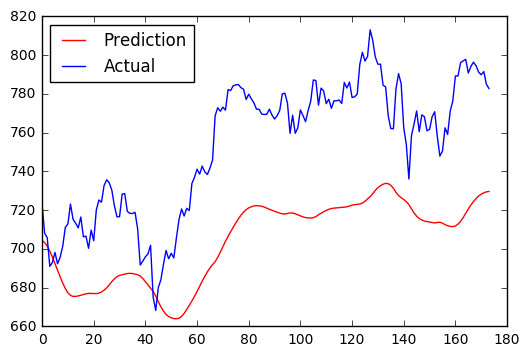

In [100]:
import matplotlib.pyplot as plt2

plt2.plot(newp,color='red', label='Prediction')
plt2.plot(newy_test,color='blue', label='Actual')
plt2.legend(loc='best')
plt2.show()

# ANOTHER

In [70]:
#https://www.kaggle.com/pablocastilla/predict-stock-prices-with-lstm

In [57]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.cross_validation import  train_test_split
import time #helper libraries
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis

/home/octo/anaconda2/envs/carnd-term1/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [65]:
prices_dataset = pd.read_csv('/home/octo/Downloads/nyse/prices.csv')
prices_dataset.head(3)

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0


In [67]:
yahoo = prices_dataset[prices_dataset['symbol']=='YHOO']
yahoo_stock_prices = yahoo.close.values.astype('float32')
yahoo_stock_prices = yahoo_stock_prices.reshape(1762, 1)
yahoo_stock_prices.shape

(1762, 1)

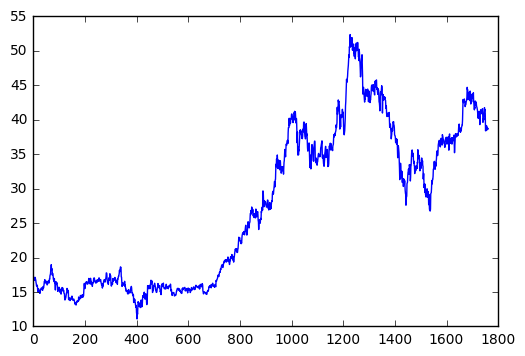

In [71]:
plt.plot(yahoo_stock_prices)
plt.show()

scaler = MinMaxScaler(feature_range=(0, 1))
yahoo_stock_prices = scaler.fit_transform(yahoo_stock_prices)

In [72]:
train_size = int(len(yahoo_stock_prices) * 0.80)
test_size = len(yahoo_stock_prices) - train_size
train, test = yahoo_stock_prices[0:train_size,:], yahoo_stock_prices[train_size:len(yahoo_stock_prices),:]
print(len(train), len(test))

1409 353


In [73]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [74]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [75]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [77]:
#Step 2 Build Model
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print ('compilation time : ', time.time() - start)

compilation time :  0.030323505401611328


In [78]:
model.fit(
    trainX,
    trainY,
    batch_size=128,
    nb_epoch=10,
    validation_split=0.05)

Train on 1336 samples, validate on 71 samples
Epoch 1/10
1336/1336 [==============================] - 3s - loss: 0.1344 - val_loss: 0.2883
Epoch 2/10
1336/1336 [==============================] - 0s - loss: 0.0673 - val_loss: 0.1277
Epoch 3/10
1336/1336 [==============================] - 

In [80]:
def plot_results_multiple(predicted_data, true_data,length):
    plt.plot(scaler.inverse_transform(true_data.reshape(-1, 1))[length:])
    plt.plot(scaler.inverse_transform(np.array(predicted_data).reshape(-1, 1))[length:])
    plt.show()
    
#predict lenght consecutive values from a real one
def predict_sequences_multiple(model, firstValue,length):
    prediction_seqs = []
    curr_frame = firstValue
    
    for i in range(length): 
        predicted = []        
        
        print(model.predict(curr_frame[newaxis,:,:]))
        predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])
        
        curr_frame = curr_frame[0:]
        curr_frame = np.insert(curr_frame[0:], i+1, predicted[-1], axis=0)
        
        prediction_seqs.append(predicted[-1])
        
    return prediction_seqs

[[ 0.60941976]]
[[ 1.36198628]]
[[ 2.93209624]]
[[ 5.88086605]]
[[ 9.26370239]]
[[  36.24684525]
 [  67.31278992]
 [ 132.12693787]
 [ 253.85214233]
 [ 393.49563599]]


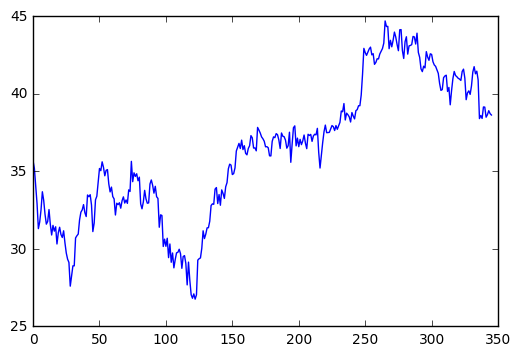

In [81]:
predict_length=5
predictions = predict_sequences_multiple(model, testX[0], predict_length)
print(scaler.inverse_transform(np.array(predictions).reshape(-1, 1)))
plot_results_multiple(predictions, testY, predict_length)

# ANOTHER

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import pandas as pd
from pandas import datetime
import math, time
import itertools
from sklearn import preprocessing
import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
from keras.models import load_model
import keras
import pandas_datareader.data as web
import h5py

In [157]:
import numpy as np
import pandas as pd
import warnings; warnings.simplefilter('ignore')
# plotting
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
from sklearn import linear_model
#sqqq and tqqq are taken as IBdata feed not for SPXS 
path = '/home/octo/Dropbox/IQ_data/'
spy=pd.read_csv(path + 'SPY.csv',names = ["high", "low", "open","close","total_volume","volume"],index_col=0, parse_dates=True)
sqqq= pd.read_csv(path + 'SQQQ.csv',names = ["high", "low", "open","close","total_volume","volume"],index_col=0, parse_dates=True)
tqqq=pd.read_csv(path + 'TQQQ.csv',names = ["high", "low", "open","close","total_volume","volume"],index_col=0, parse_dates=True)
spy=spy.tail(140000)
sqqq=sqqq.tail(140000)
tqqq=tqqq.tail(140000)

In [178]:
seq_len = 22
d = 0.2
shape = [5, seq_len, 1] # feature, window, output
neurons = [128, 128, 32, 1]
epochs = 30 #300

In [159]:
def normalize_dataset(stock, normalize=True):
    df = stock
    df.drop(["total_volume","volume"], 1, inplace=True)
    
    if normalize:        
        min_max_scaler = preprocessing.MinMaxScaler()
        df['open'] = min_max_scaler.fit_transform(df.open.values.reshape(-1,1))
        df['high'] = min_max_scaler.fit_transform(df.high.values.reshape(-1,1))
        df['Low'] = min_max_scaler.fit_transform(df.low.values.reshape(-1,1))
        df['close'] = min_max_scaler.fit_transform(df.close.values.reshape(-1,1))
    return df

In [160]:
#df = normalize_dataset(spy, normalize=True)

In [161]:
def plot_stock(stock_name):
    df = normalize_dataset(stock_name, normalize=True)
    print(df.head())
    plt.plot(df.close, color='black', label='close')
    plt.legend(loc='best')
    plt.show()

                         high     low      open     close       Low
2017-03-14 11:30:05  0.662850  236.86  0.661597  0.664140  0.663717
2017-03-14 11:30:10  0.662850  236.88  0.664132  0.664140  0.666245
2017-03-14 11:30:15  0.663486  236.88  0.664766  0.664140  0.666245
2017-03-14 11:30:20  0.661578  236.85  0.662864  0.660351  0.662453
2017-03-14 11:30:25  0.660305  236.84  0.660456  0.659070  0.661188


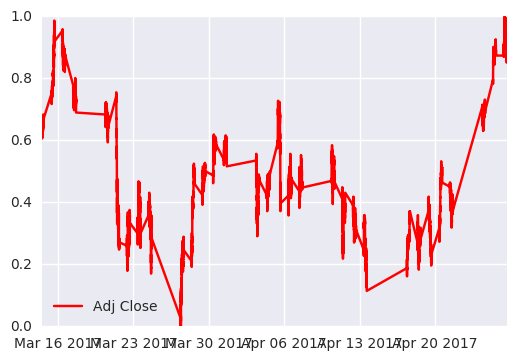

In [162]:
plot_stock(spy)

##### Set last day Close as y

In [163]:
def load_data(stock, seq_len):
    amount_of_features = len(stock.columns)
    data = stock.as_matrix() 
    sequence_length = seq_len + 1 # index starting from 0
    result = []
    
    for index in range(len(data) - sequence_length): # maxmimum date = lastest date - sequence length
        result.append(data[index: index + sequence_length]) # index : index + 22days
    
    result = np.array(result)
    row = round(0.9 * result.shape[0]) # 90% split
    
    train = result[:int(row), :] # 90% date
    X_train = train[:, :-1] # all data until day m
    y_train = train[:, -1][:,-1] # day m + 1 adjusted close price
    
    X_test = result[int(row):, :-1]
    y_test = result[int(row):, -1][:,-1] 

    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], amount_of_features))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], amount_of_features))  

    return [X_train, y_train, X_test, y_test]

In [164]:
X_train, y_train, X_test, y_test = load_data(df, seq_len)

In [169]:
X_train.shape[0], X_train.shape[1], X_train.shape[2]

(125979, 22, 5)

In [170]:
y_train.shape[0]

125979

### Buidling neural network

In [173]:
def build_model2(layers, neurons, d):
    model = Sequential()
    
    model.add(LSTM(neurons[0], input_shape=(layers[1], layers[0]), return_sequences=True))
    model.add(Dropout(d))
        
    model.add(LSTM(neurons[1], input_shape=(layers[1], layers[0]), return_sequences=False))
    model.add(Dropout(d))
    
    model.add(Dense(neurons[2],activation='relu'))        
    model.add(Dense(neurons[3],activation='linear'))
        
    #model.add(Dense(neurons[2],kernel_initializer="uniform",activation='relu'))        
    #model.add(Dense(neurons[3],kernel_initializer="uniform",activation='linear'))
    # model = load_model('my_LSTM_stock_model1000.h5')
    # adam = keras.optimizers.Adam(decay=0.2)
    model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model

In [179]:
model = build_model2(shape, neurons, d)
# layers = [4, 22, 1]

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lstm_31 (LSTM)                   (None, 22, 128)       68608       lstm_input_16[0][0]              
____________________________________________________________________________________________________
dropout_31 (Dropout)             (None, 22, 128)       0           lstm_31[0][0]                    
____________________________________________________________________________________________________
lstm_32 (LSTM)                   (None, 128)           131584      dropout_31[0][0]                 
____________________________________________________________________________________________________
dropout_32 (Dropout)             (None, 128)           0           lstm_32[0][0]                    
___________________________________________________________________________________________

In [180]:
model.fit(
    X_train,
    y_train,
    batch_size=512,
    validation_split=0.1,
    verbose=1)

Train on 113381 samples, validate on 12598 samples
Epoch 1/10
113381/113381 [==============================] - 109s - loss: 0.0457 - acc: 8.8198e-06 - val_loss: 0.0109 - val_acc: 0.0000e+00

#### Result on training set and testing set

In [181]:
def model_score(model, X_train, y_train, X_test, y_test):
    trainScore = model.evaluate(X_train, y_train, verbose=0)
    print('Train Score: %.5f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))

    testScore = model.evaluate(X_test, y_test, verbose=0)
    print('Test Score: %.5f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))
    return trainScore[0], testScore[0]

In [182]:
model_score(model, X_train, y_train, X_test, y_test)

Train Score: 0.00082 MSE (0.03 RMSE)
Test Score: 0.00110 MSE (0.03 RMSE)


(0.00081614095244420502, 0.001095905975259711)

#### Prediction vs Real results

In [183]:
def percentage_difference(model, X_test, y_test):
    percentage_diff=[]

    p = model.predict(X_test)
    for u in range(len(y_test)): # for each data index in test data
        pr = p[u][0] # pr = prediction on day u

        percentage_diff.append((pr-y_test[u]/pr)*100)
    return p

In [184]:
p = percentage_difference(model, X_test, y_test)

#### Plot out prediction

In [185]:
def denormalize(stock_name, normalized_value):
    start = datetime.datetime(2000, 1, 1)
    end = datetime.date.today()
    df = web.DataReader(stock_name, "yahoo", start, end)
    
    df = df['Adj Close'].values.reshape(-1,1)
    normalized_value = normalized_value.reshape(-1,1)
    
    #return df.shape, p.shape
    min_max_scaler = preprocessing.MinMaxScaler()
    a = min_max_scaler.fit_transform(df)
    new = min_max_scaler.inverse_transform(normalized_value)
    return new

In [186]:
def plot_result(stock_name, normalized_value_p, normalized_value_y_test):
    newp = denormalize(stock_name, normalized_value_p)
    newy_test = denormalize(stock_name, normalized_value_y_test)
    plt2.plot(newp, color='red', label='Prediction')
    plt2.plot(newy_test,color='blue', label='Actual')
    plt2.legend(loc='best')
    plt2.title('The test result for {}'.format(stock_name))
    plt2.xlabel('Days')
    plt2.ylabel('Adjusted Close')
    plt2.show()

In [190]:
#https://github.com/BenjiKCF/Neural-Network-with-Financial-Time-Series-Data/blob/master/LSTM_Stock_prediction_20170508.ipynb

In [189]:
#plot_result(spy, p, y_test)

In [ ]:
#Save for consistency
# model.save('LSTM_Stock_prediction-20170530.h5')

In [192]:
# print(X_test[-1])
diff=[]
ratio=[]
p = model.predict(X_test)
print (p.shape)
# for each data index in test data
for u in range(len(y_test)):
    # pr = prediction day u
    pr = p[u][0]
    # (y_test day u / pr) - 1
    ratio.append((y_test[u]/pr)-1)
    diff.append(abs(y_test[u]- pr))
    # print(u, y_test[u], pr, (y_test[u]/pr)-1, abs(y_test[u]- pr))
    # Last day prediction
    # print(p[-1])

(13998, 1)


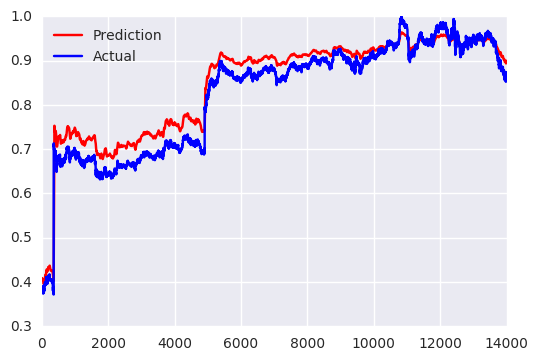

In [193]:
import matplotlib.pyplot as plt2

plt2.plot(p,color='red', label='Prediction')
plt2.plot(y_test,color='blue', label='Actual')
plt2.legend(loc='best')
plt2.show()

In [196]:
def denormalize(stock_name, normalized_value):
    start = datetime.datetime(2000, 1, 1)
    end = datetime.date.today()
    df = web.DataReader(stock_name, "yahoo", start, end)
    
    df = df['Adj Close'][-432:].reshape(-1,1)
    normalized_value = normalized_value.reshape(-1,1)
    
    #return df.shape, p.shape
    min_max_scaler = preprocessing.MinMaxScaler()
    a = min_max_scaler.fit_transform(df)
    new = min_max_scaler.inverse_transform(normalized_value)
    return new

In [ ]:
#newp = denormalize(spy, p)
newy_test = denormalize(spy, y_test)

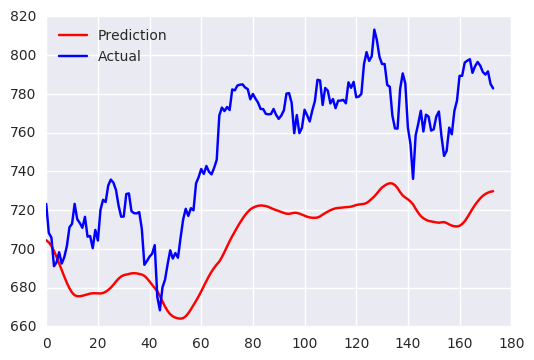

In [197]:
import matplotlib.pyplot as plt2

plt2.plot(newp, color='red', label='Prediction')
plt2.plot(newy_test,color='blue', label='Actual')
plt2.legend(loc='best')
plt2.show()

In [198]:
#model.save('LSTM_Stock_prediction-20170530.h5')

## ANOTHER

In [199]:
from __future__ import print_function
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.cross_validation import  train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import math

# to not display the warnings of tensorflow
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

In [200]:
# parameters to be set ("optimum" hyperparameters obtained from grid search):
look_back = 7
epochs = 10
batch_size = 32

In [201]:
# fix random seed for reproducibility
np.random.seed(7)

In [202]:
# read all prices using panda
prices_dataset = pd.read_csv("/home/octo/Downloads/nyse/prices-split-adjusted.csv",header=0)

In [203]:
# filter out only data of Apple
apple = prices_dataset[prices_dataset['symbol']=='AAPL']

In [204]:
# save Apple's stock values as type of floating point number
apple_stock_prices = apple.close.values.astype('float32')

In [205]:
# reshape to column vector
apple_stock_prices = apple_stock_prices.reshape(len(apple_stock_prices), 1)

In [206]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
apple_stock_prices = scaler.fit_transform(apple_stock_prices)

In [207]:
# split data into training set and test set
train_size = int(len(apple_stock_prices) * 0.67)
test_size = len(apple_stock_prices) - train_size
train, test = apple_stock_prices[0:train_size,:], apple_stock_prices[train_size:len(apple_stock_prices),:]

print('Split data into training set and test set... Number of training samples/ test samples:', len(train), len(test))

Split data into training set and test set... Number of training samples/ test samples: 1180 582


In [208]:
# convert an array of values into a time series dataset 
# in form 
#                     X                     Y
# t-look_back+1, t-look_back+2, ..., t     t+1

def create_dataset(dataset, look_back):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

# convert Apple's stock price data into time series dataset
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [209]:
# reshape input of the LSTM to be format [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [210]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=epochs, batch_size=batch_size)

Epoch 1/10
1172/1172 [==============================] - 1s - loss: 0.0268      

In [211]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [212]:
# invert predictions and targets to unscaled
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [213]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 2.41 RMSE
Test Score: 12.27 RMSE


In [214]:
# shift predictions of training data for plotting
trainPredictPlot = np.empty_like(apple_stock_prices)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift predictions of test data for plotting
testPredictPlot = np.empty_like(apple_stock_prices)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(apple_stock_prices)-1, :] = testPredict

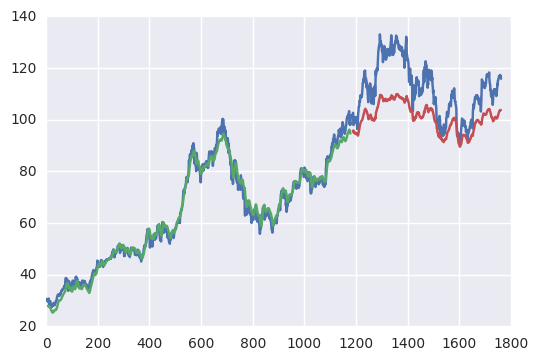

In [215]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(apple_stock_prices))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()